In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 250}


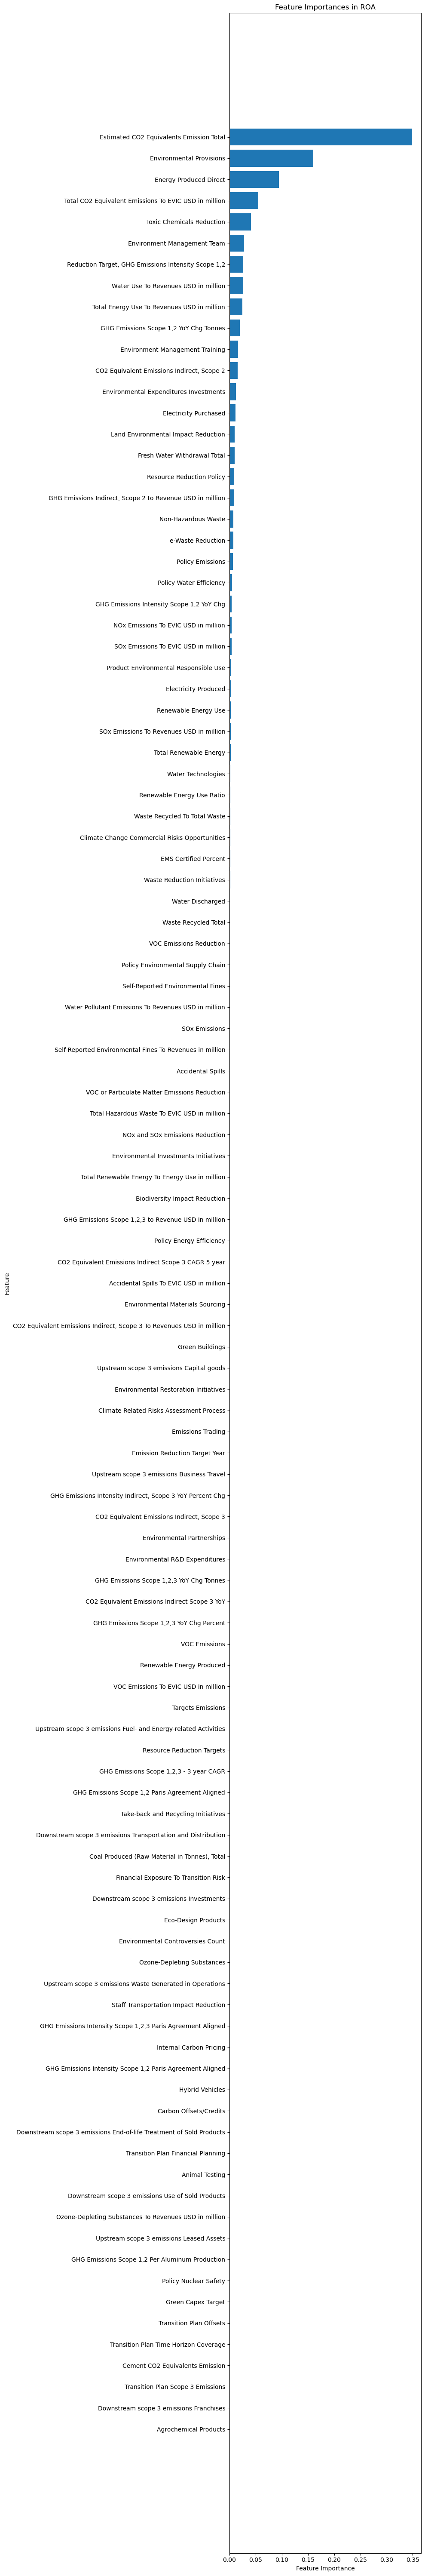

Model Performance:
Mean Squared Error (MSE): 0.00016632054740285435


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load Excel file
df = pd.read_excel('/Users/aizixin/Desktop/Scaled_Imputed_Data.xlsx')

# Extract features and target variable
X = df.drop(['ROA', 'Instrument'], axis=1)
y = df['ROA']

# Encode categorical variables
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Retrain model using the best parameters
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(X_train, y_train)

# Predict
y_pred = best_rf_regressor.predict(X_test)

# Get feature importances
feature_importances = best_rf_regressor.feature_importances_

# Store features and their importance in a DataFrame and sort them
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in descending order
plt.figure(figsize=(10, 60))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in ROA')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.tight_layout()
plt.show()

# Evaluate model
mse = mean_squared_error(y_test, y_pred)

print(f'Model Performance:')
print(f'Mean Squared Error (MSE): {mse}')



                                               Feature  Importance
89            Estimated CO2 Equivalents Emission Total    0.348574
101                           Environmental Provisions    0.160112
48                              Energy Produced Direct    0.094743
58   Total CO2 Equivalent Emissions To EVIC USD in ...    0.054872
8                            Toxic Chemicals Reduction    0.041478
5                          Environment Management Team    0.028123
69   Reduction Target, GHG Emissions Intensity Scop...    0.026323
52                Water Use To Revenues USD in million    0.025928
46         Total Energy Use To Revenues USD in million    0.024485
68              GHG Emissions Scope 1,2 YoY Chg Tonnes    0.020133


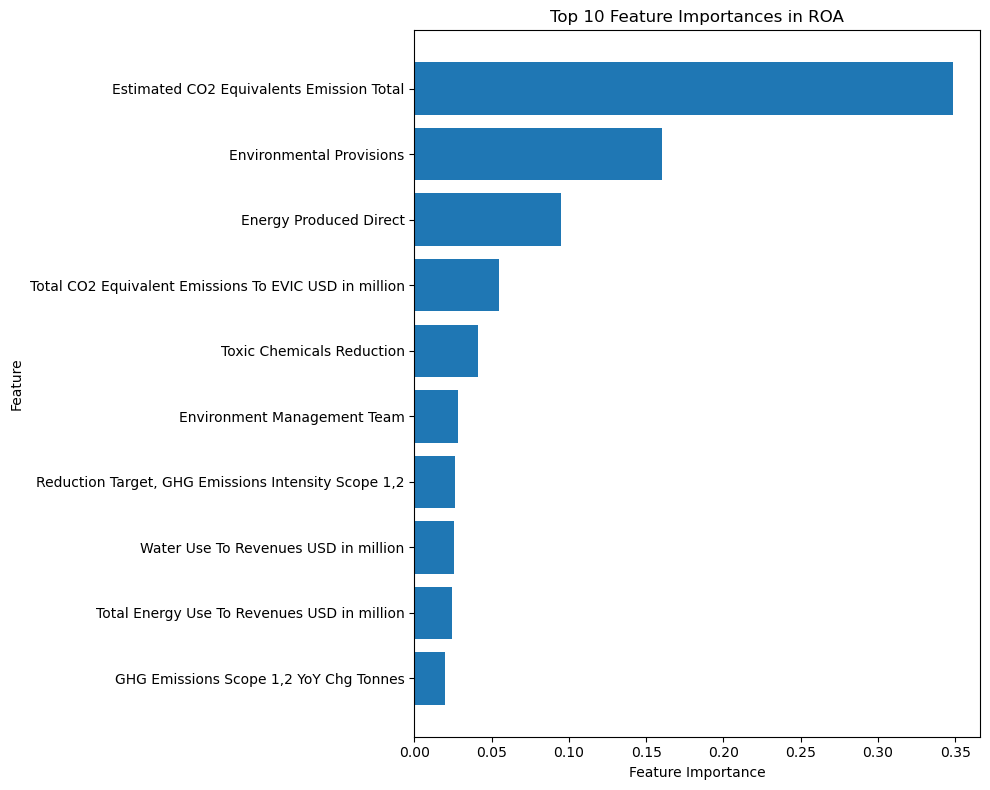

In [4]:
# Get top ten features
top_ten_features = feature_importance_df.head(10)

# Output top ten features
print(top_ten_features)

# Plot top ten feature importances in descending order
plt.figure(figsize=(10, 8))
plt.barh(top_ten_features['Feature'], top_ten_features['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in ROA')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.tight_layout()
plt.show()


In [6]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.00016632054740285435
